# Introduction

<p>Car accidents are a major concern for public safety, leading to injuries and fatalities. In this machine learning project, we aim to predict the severity of car accidents in the United States using a comprehensive dataset covering 49 states from February 2016 to December 2021. With approximately 2.8 million accident records collected from multiple APIs, we will preprocess the data, explore patterns, select relevant features, train machine learning models, and deploy a predictive tool to aid emergency services and improve road safety.</p>

# About Data

# ***About Dataset:***
#### ***Source: Kaggle***
#### ***Dataset_Name: US_car_accidents_2016-2021***
#### ***Source_link:***
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
#### ***Size 1.5GB***
#### ***Description:***
This dataset contains the number of car accidents in the US from Feb 2016 to 2021.
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

### ***Features:***
### We have 47 features in this dataset, but we will discuss only few of them which are more useful.
- useful columns
#### 1. Severity:
- hows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).	No
#### 2. Start_Lat
-	Shows latitude in GPS coordinate of the start point.	No
#### 3. Start_Lng
-	Shows longitude in GPS coordinate of the start point.	No
#### 5. Distance(mi)
-	The length of the road extent affected by the accident.	No
#### 6. City
-	Shows the city in address field.	Yes
#### 7. State
-	Shows the state in address field.	Yes
#### 8. Country
-	Shows the country in address field.	Yes
#### 9. Temperature(F)
-	Shows the temperature (in Fahrenheit).	Yes
#### 10. Humidity(%)
-	Shows the humidity (in percentage).	Yes
#### 11. Visibility(mi)
-	Shows visibility (in miles).	
#### 13. Wind_Direction
-	Shows wind direction.	
#### 14. Weather_Condition
-	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)	Yes

In [2]:
#import pandas as pd
#pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split



plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = ["sans-serif"]


ModuleNotFoundError: No module named 'geopandas'

## ***Reading data***

In [1]:
# Load the CSV file into a DataFrame
df = pd.read_csv('C:\\Users\\isc\\Documents\\Data Mining2\\Datasets\\US_Accidents_Dec21_updated.csv')

NameError: name 'pd' is not defined

In [50]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 2,845,342 & Columns: 47


In [51]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [52]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(2845342, 47)
(943318, 47)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     943318 non-null  object        
 1   Severity               943318 non-null  int64         
 2   Start_Time             943318 non-null  datetime64[ns]
 3   End_Time               943318 non-null  datetime64[ns]
 4   Start_Lat              943318 non-null  float64       
 5   Start_Lng              943318 non-null  float64       
 6   End_Lat                943318 non-null  float64       
 7   End_Lng                943318 non-null  float64       
 8   Distance(mi)           943318 non-null  float64       
 9   Description            943318 non-null  object        
 10  Number                 943318 non-null  float64       
 11  Street                 943318 non-null  object        
 12  Side                   943318 non-null  ob

## ***Rows & Columns***

In [5]:
print(df.shape[0])
print(df.shape[1])

2845342
47


In [31]:
df.head  # Or perform any other operations with the testing data

<bound method NDFrame.head of                 ID  Severity          Start_Time            End_Time  \
42            A-43         4 2016-02-09 18:20:58 2016-02-10 00:20:58   
43            A-44         4 2016-02-09 18:20:58 2016-02-10 00:20:58   
47            A-48         4 2016-02-10 06:18:49 2016-02-10 12:18:49   
50            A-51         2 2016-02-10 08:35:27 2016-02-10 14:35:27   
66            A-67         2 2016-02-10 12:54:39 2016-02-10 18:54:39   
...            ...       ...                 ...                 ...   
2845298  A-2845299         3 2019-08-23 16:19:21 2019-08-23 16:48:04   
2845302  A-2845303         4 2019-08-23 17:25:12 2019-08-23 17:54:00   
2845303  A-2845304         4 2019-08-23 17:25:12 2019-08-23 17:54:00   
2845304  A-2845305         3 2019-08-23 01:16:01 2019-08-23 01:44:53   
2845307  A-2845308         3 2019-08-23 10:32:30 2019-08-23 11:01:40   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
42       40.451120  -85.150480  40

## ***Information about data***

In [5]:
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

## ***Statisical Information***

In [6]:
df.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  853603.000000  853603.000000  853603.000000  853603.000000   
mean        2.137238      36.243838     -97.135938      36.243974   
std         0.478284       5.360947      18.330440       5.361041   
min         1.000000      24.570087    -124.548074      24.570110   
25%         2.000000      33.451510    -118.041731      33.452880   
50%         2.000000      36.104340     -92.434670      36.104042   
75%         2.000000      40.157542     -80.372318      40.157671   
max         4.000000      49.000580     -67.403551      49.075000   

             End_Lng   Distance(mi)         Number  Temperature(F)  \
count  853603.000000  853603.000000  330254.000000   832731.000000   
mean      -97.135679       0.702821    8052.084586       61.839895   
std        18.330253       1.578609   15504.126569       18.618471   
min      -124.545748       0.000000       1.000000      -89.000000   
25%      -118.041762       0.051000    1266.000000       50.000000   
50%       -92.431470       0.243000    4009.000000       64.000000   
75%       -80.372823       0.764000    9533.000000       76.000000   
max       -67.403550     155.186000  961061.000000      196.000000   

       Wind_Chill(F)    Humidity(%)   Pressure(in)  Visibility(mi)  \
count  712587.000000  831546.000000  835751.000000   832292.000000   
mean       59.717661      64.358788      29.473238        9.098514   
std        21.144364      22.870182       1.042904        2.711820   
min       -89.000000       1.000000       2.990000        0.000000   
25%        46.000000      48.000000      29.320000       10.000000   
50%        63.000000      67.000000      29.820000       10.000000   
75%        76.000000      83.000000      30.010000       10.000000   
max       196.000000     100.000000      56.310000      130.000000   

       Wind_Speed(mph)  Precipitation(in)  
count    805953.000000      688706.000000  
mean          7.400662           0.007242  
std           5.425949           0.108343  
min           0.000000           0.000000  
25%           3.500000           0.000000  
50%           7.000000           0.000000  
75%          10.000000           0.000000  
max         518.000000          24.000000

### ***Length of Numerical data***


In [4]:
#numeric data in dataframe
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.head())
len(numeric_df.columns)

   Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  Number  \
0         3  40.108910 -83.092860  40.112060 -83.031870         3.230     NaN   
1         2  39.865420 -84.062800  39.865010 -84.048730         0.747     NaN   
2         2  39.102660 -84.524680  39.102090 -84.523960         0.055     NaN   
3         2  41.062130 -81.537840  41.062170 -81.535470         0.123     NaN   
4         3  39.172393 -84.492792  39.170476 -84.501798         0.500     NaN   

   Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0            42.1           36.1         58.0         29.76            10.0   
1            36.9            NaN         91.0         29.68            10.0   
2            36.0            NaN         97.0         29.70            10.0   
3            39.0            NaN         55.0         29.65            10.0   
4            37.0           29.8         93.0         29.69            10.0   

   Wind_Speed(mph)  Precipitation(in) 

14

### ***Length of Categorical data***

In [5]:
# categorical data in dataframe
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.head())
len(categorical_df.columns)

    ID           Start_Time             End_Time  \
0  A-1  2016-02-08 00:37:08  2016-02-08 06:37:08   
1  A-2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2  A-3  2016-02-08 06:15:39  2016-02-08 12:15:39   
3  A-4  2016-02-08 06:51:45  2016-02-08 12:51:45   
4  A-5  2016-02-08 07:53:43  2016-02-08 13:53:43   

                                         Description       Street Side  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  Outerbelt E    R   
1                 At OH-4/OH-235/Exit 41 - Accident.       I-70 E    R   
2                   At I-71/US-50/Exit 1 - Accident.       I-75 S    R   
3                    At Dart Ave/Exit 21 - Accident.       I-77 N    R   
4                 At Mitchell Ave/Exit 6 - Accident.       I-75 S    R   

         City      County State Zipcode Country    Timezone Airport_Code  \
0      Dublin    Franklin    OH   43017      US  US/Eastern         KOSU   
1      Dayton  Montgomery    OH   45424      US  US/Eastern         KFFO   
2  Cincinnati 

20

# Exploratory data analysis 

## Histogram of the Distribution of Accidents by State

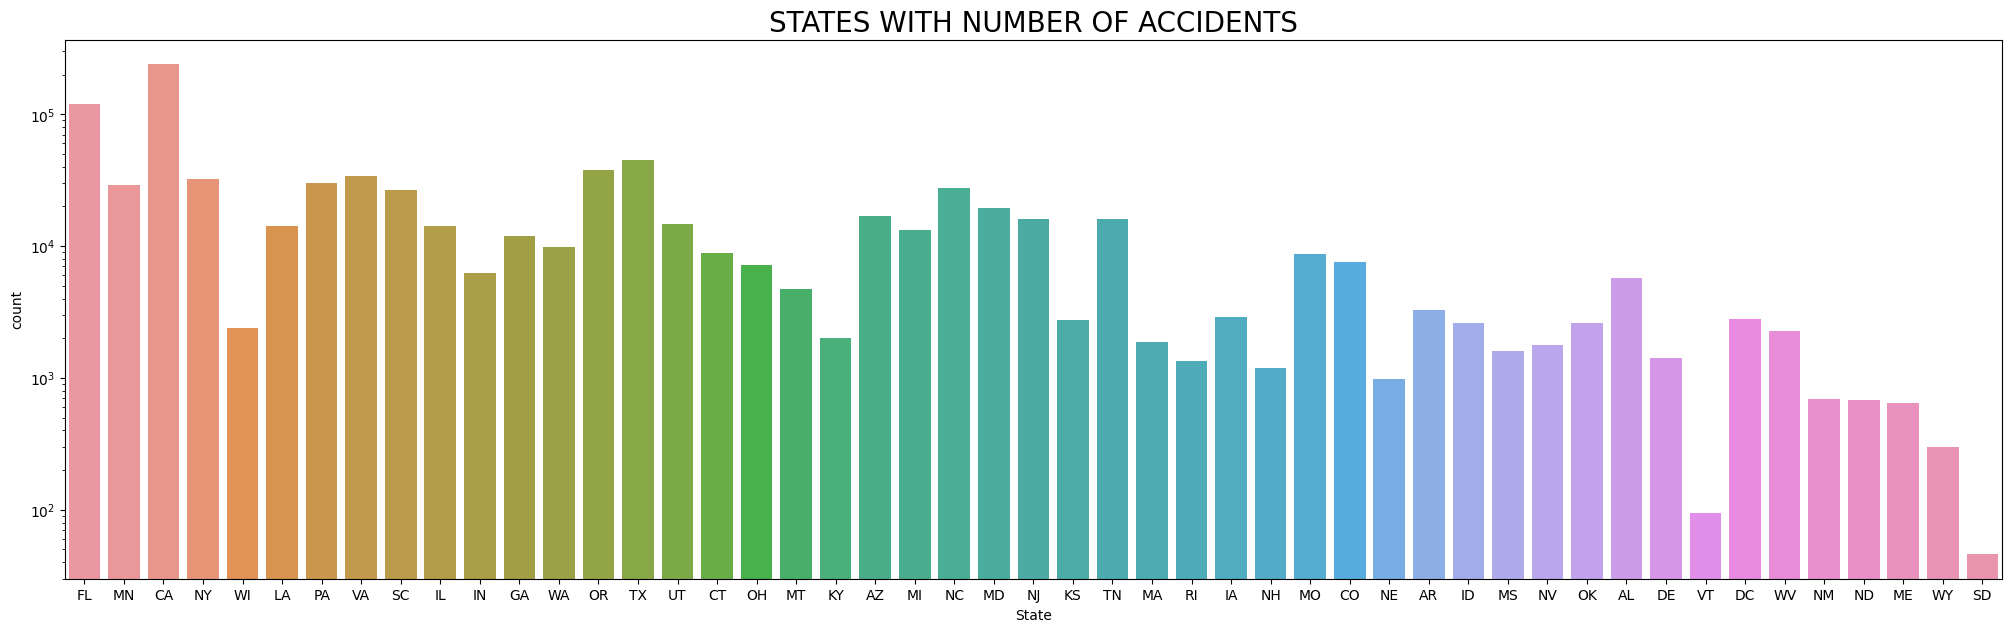

In [9]:
plt.figure(figsize=(25,7))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

## Top 10 Cities with the Highest Number of Accidents

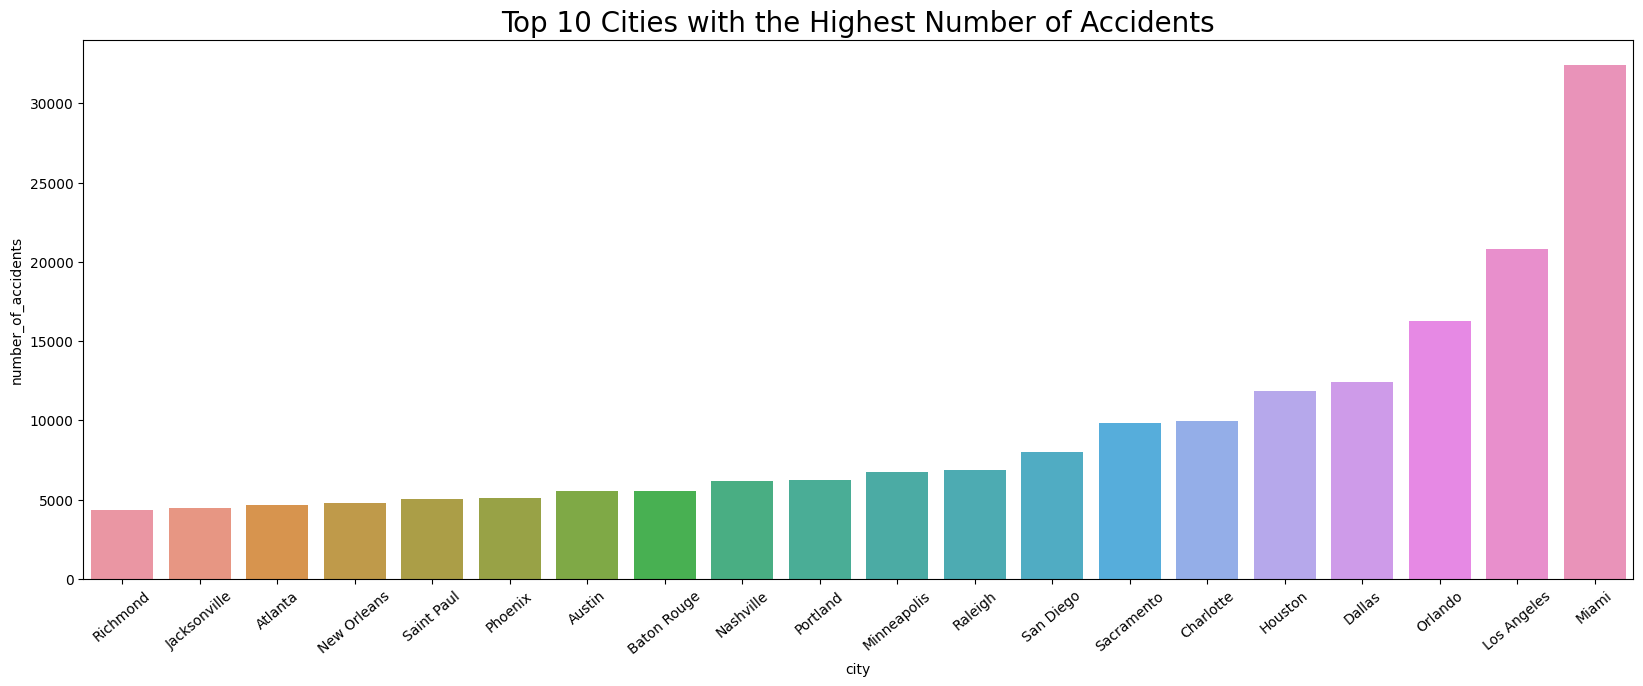

In [23]:
top_cities = df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns = ["city", "number_of_accidents"]

plt.figure(figsize=(20, 7))
sns.barplot(x="city", y="number_of_accidents", data=top_cities)
plt.title("Top 10 Cities with the Highest Number of Accidents", fontsize=20)
plt.xticks(rotation=40)
plt.show()

## Top 20 Weather Conditions for Accidents by Severity Level

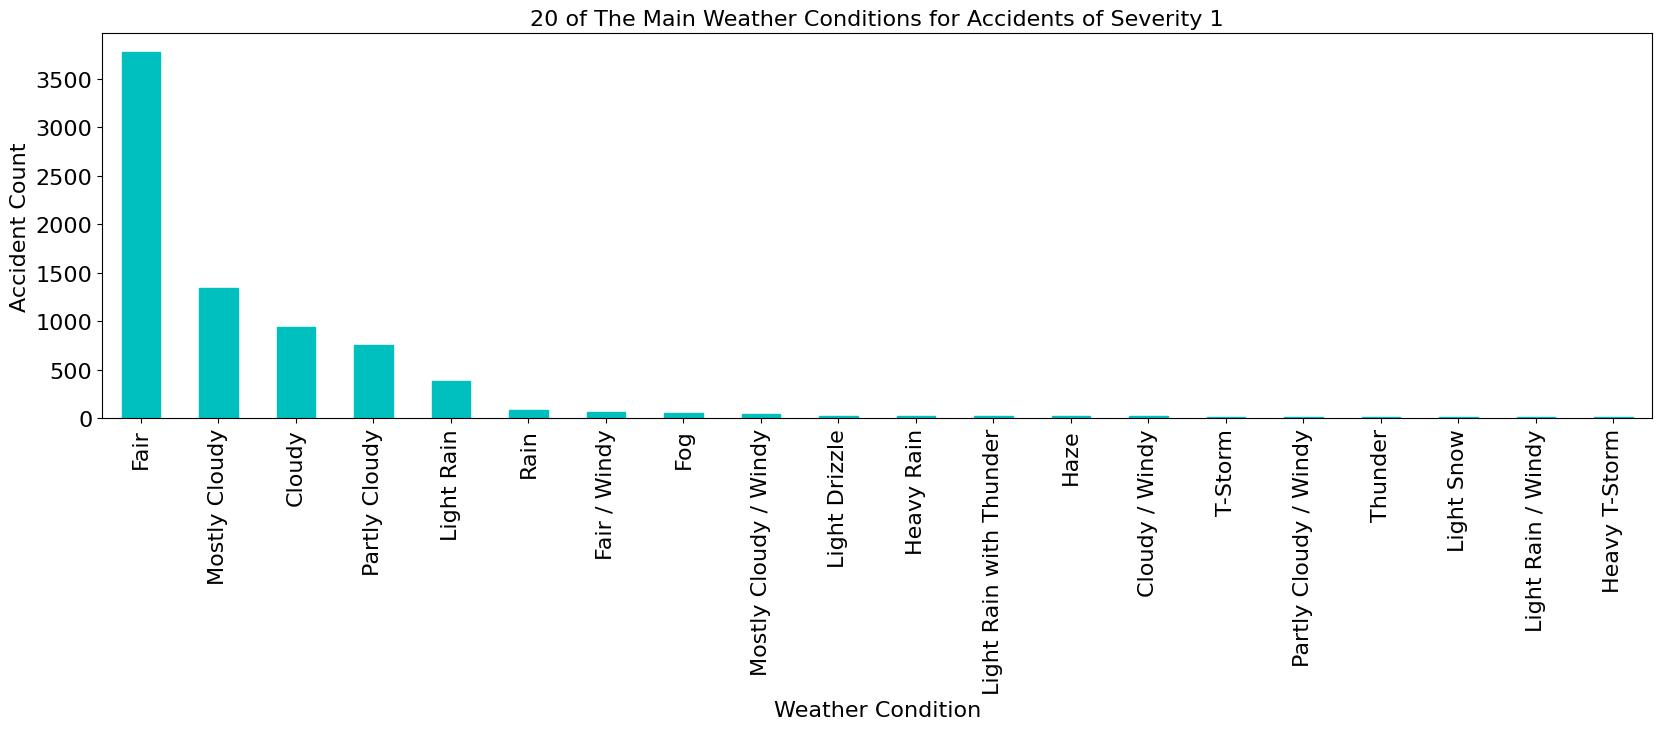

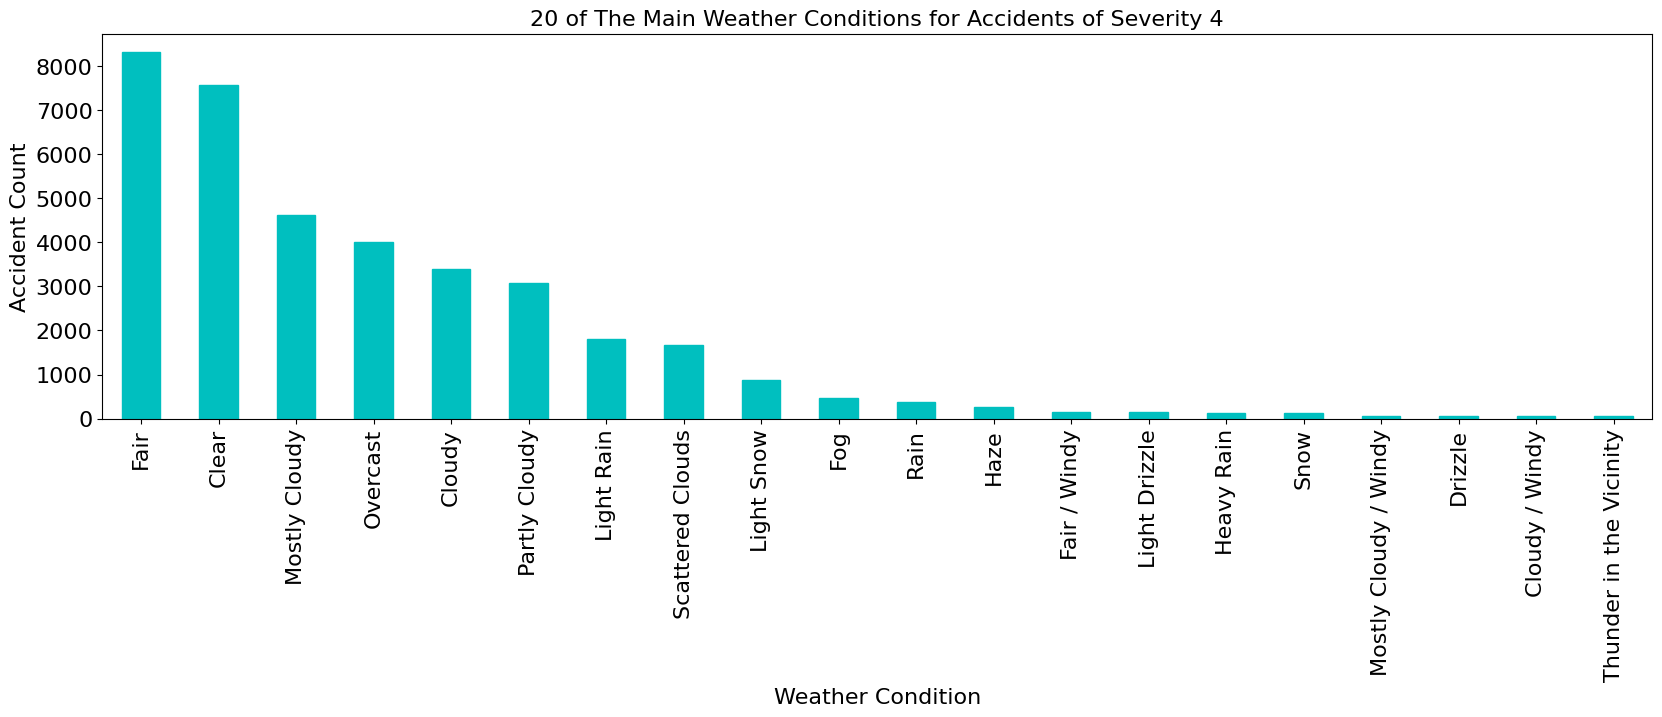

In [24]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='c',edgecolor='c',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

# Feature Engineering



Create column that describes the period of the accident by subtracting end time with the start time of the accident


In [11]:
df['Duration(H)']=(pd.to_datetime(df.End_Time)-pd.to_datetime(df.Start_Time)).astype('timedelta64[h]')

In [12]:
df["Duration(H)"].describe()

count    943318.000000
mean          3.820934
std          84.626403
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max       16022.000000
Name: Duration(H), dtype: float64

## City analysis

In [33]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [34]:
top_10_cities = pd.DataFrame(city_df.head(10))

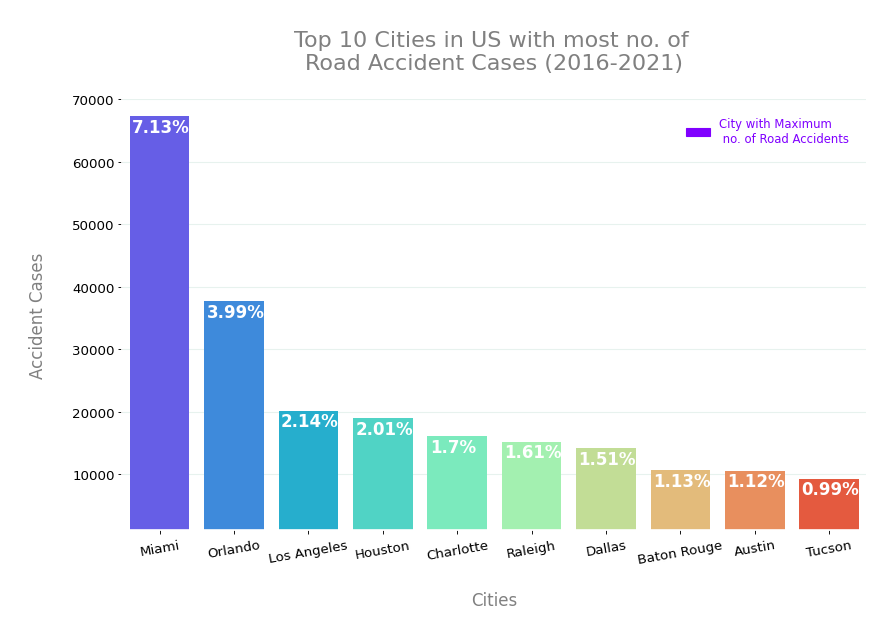

In [35]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='white')

plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2021)\n', size=20, color='grey')

plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = ["sans-serif"]

plt.ylim(1000, 70000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()

<ul>
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul >
    <li> <span style="font-weight: bold; ">Miami</span> is the city with <span style="font-weight: bold; ">highest (7.13%)</span> no. of road accidents in US (2016-2021).</li>
    <br>
    <li> <span style="font-weight: bold; ">Orlando</span> is the city with <span style="font-weight: bold; ">2nd highest (3.99%)</span> no. of road accidents in US (2016-2021).</li>
    <br>
    <li> Around <span style="font-weight: bold; ">23%</span> accident records of past 5 years are only from these <span style="font-weight: bold; ">10 cities</span> out of 10,657 cities in US (as per the dataset).</li>

</ul>
</div>

In [36]:
hightest_cases = city_df.Cases[0]
print(round(hightest_cases/5))
print(round(hightest_cases/(5*365)))

13455
37



<ul>
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> In past 5 years (2016-2021) <span style="font-weight: bold;">yearly 13,455 road accidents</span> (average) happened in <span style="font-weight: bold;">Miami</span>.</li>
<br>
<li> In <span style="font-weight: bold;">Los Angeles</span> averagely in <span style="font-weight: bold;">every 24 hours 37 accidents</span> occurred.</li>
</ul>
</div>

In [58]:
<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

898 Cities, 10.56%
7145 Cities, 84.02%
8388 Cities, 98.64%
116 Cities, 1.36%
17 Cities, 0.2%
9 Cities, 0.11%


 

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic">Insights:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black"> 
<li>In this Dataset, we have the records of total <b>8,503 Cities</b>.</li> 
<br>
<li> <span style="font-weight: bold;">10.56% (898 Cities)</span> cities in US, have <span style="font-weight: bold">only 1</span> accident record in past 5 years.</li> 
<br>
<li> Around <span style="font-weight: bold; ">84.02% (7,145 Cities)</span> of all cities in US, have <span style="font-weight: bold; ">less than 100</span> total no. of road accidents.</li>
<br>
<li> <span style="font-weight: bold; ">98.64% (8,388 Cities)</span> cities in US, have the road accident records (2016-2020), <span style="font-weight: bold; ">less than 1,000</span>.</li>
<br>
<li> There are <span style="font-weight: bold; ">116 Cities (1.36%)</span> in US, which have <span style="font-weight: bold; ">more than 1,000</span> total no. of road accidents in past 5 years.</li>
<br>
<li> <span style="font-weight: bold; ">17 Cities (0.2%)</span> in US, have <span style="font-weight: bold; ">more than 5,000</span> road accident records.</li>
<br>
<li> Only <span style="font-weight: bold; ">9 Cities (0.11%)</span> in US, have <span style="font-weight: bold; ">more than 10,000</span> road accident records.</li>
</ul>
</div>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">State Analysis</li>
</ul>

In [56]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)


top_ten_states_name = list(state_df['State'].head(10))

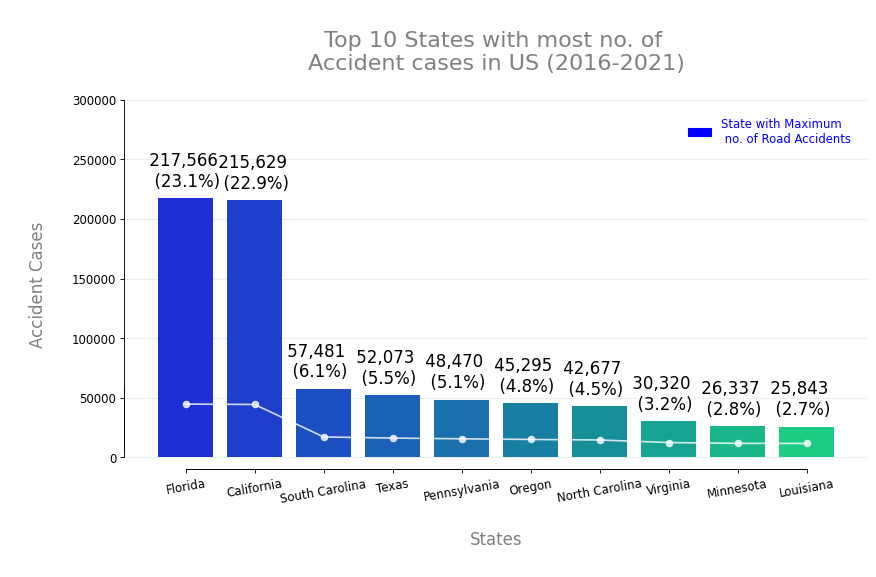

In [57]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)


total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-10000, 300000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2021)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 300000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 300000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;  ">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> In US, <span style="font-weight: bold; ">Florida</span> is the state with <span style="font-weight: bold;">highest no. of road accidents </span> in past 5 years.</li>
<br>
<li> About <span style="font-weight: bold;">23%</span> of the total accident records of past 5 years in US is only from <span style="font-weight: bold; ">Florida</span>.</li>
<br>
<li> In past 5 years, averagely <span style="font-weight: bold;">246 accidents (daily)</span> happened  in <span style="font-weight: bold; ">California </span> implies approximately <span style="font-weight: bold;">10 accidents per hour</span>.</li>
<br>
<li> <span style="font-weight: bold;">Florida</span> is the <span style="font-weight: bold; ">2nd highest (10% cases)</span> state for no. road accidents in US.</li> 
</ul>
</div>

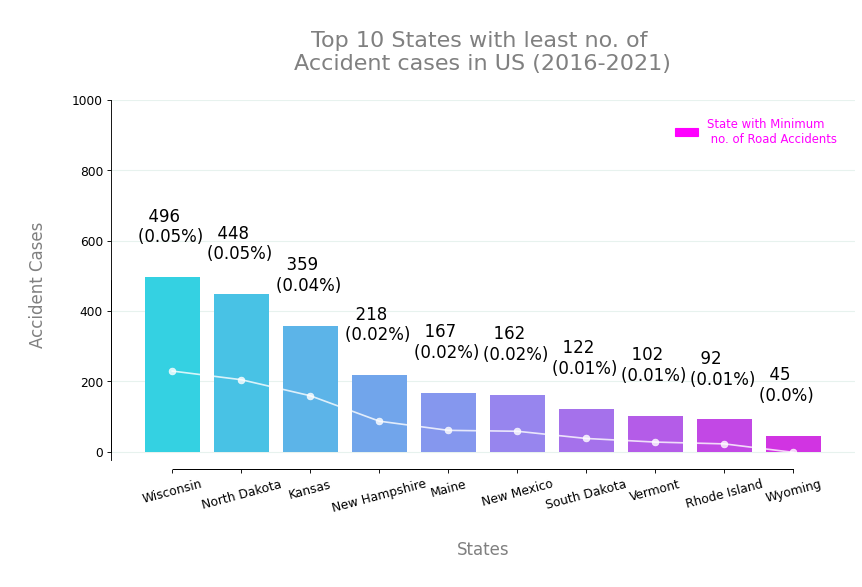

In [58]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('cool', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].tail(10), x=state_df['State'].tail(10), palette='cool')
ax1 = ax.twinx()
sns.lineplot(data = state_df[-10:], marker='o', x='State', y='Cases', color = 'white', alpha = .8)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.1, i.get_height()+100, \
            '  {:,d}\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=15,
                color='black')

ax.set(ylim =(-50, 1000))
ax1.set(ylim =(-50, 2000))

plt.title('\nTop 10 States with least no. of \nAccident cases in US (2016-2021)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    side1 = ax1.spines[i]
    side1.set_visible(False)
    
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 1000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 1000)
ax.tick_params(axis='y', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=11, rotation=15)

MI = mpatches.Patch(color=clrs[-1], label='State with Minimum\n no. of Road Accidents')
ax.legend(handles=[MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-1], edgecolor='white');



<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> <span style="font-weight: bold">Wyoming</span> is the city with <span style="font-weight: bold">lowest no. of road accidents </span> in past 5 years.</li>
<br>
<li> Only <span style="font-weight: bold">45</span> accidents took place in <span style="font-weight: bold">Wyoming </span> in past 5 years. </li>  
</ul>
</div>


<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Timezone Analysis</li>
</ul>

In [54]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})

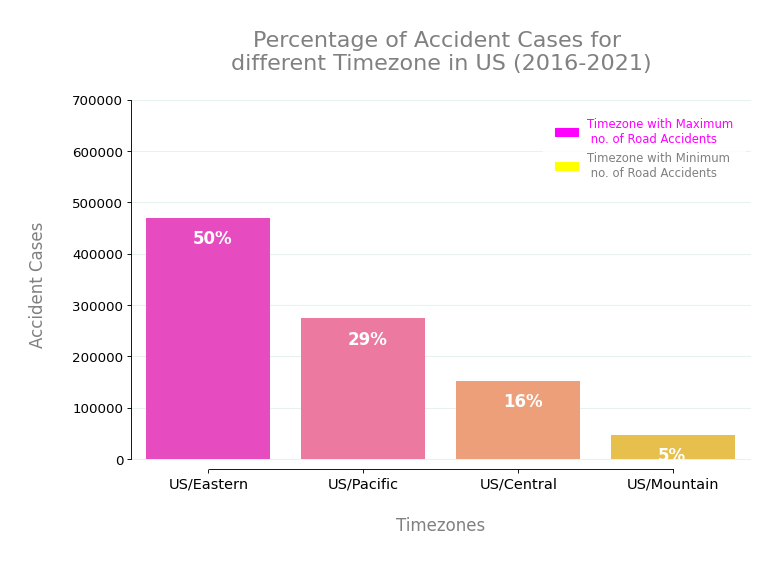

In [55]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)

cmap = cm.get_cmap('spring', 4)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=timezone_df['Cases'], x=timezone_df['Timezone'], palette='spring')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()-50000, \
            '{}%'.format(round(i.get_height()*100/total)), fontsize=15,weight='bold',
                color='white')
    

plt.ylim(-20000, 700000)
plt.title('\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2021)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nTimezones\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
ax.spines['bottom'].set_bounds(0.005, 3)
ax.spines['left'].set_bounds(0, 700000)

MA = mpatches.Patch(color=clrs[0], label='Timezone with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Timezone with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> <span style="font-weight: bold;">Eastern</span> time zone region of US has the <span style="font-weight: bold">highest no. of road accident cases (50%)</span> in past 5 years.</li>
<br>
<li> <span style="font-weight: bold">Mountain</span> time zone region of US has the <span style="font-weight: bold">lowest no. of road accident cases (5%)</span> in past 5 years.</li>
</ul>
</div>



<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Street Analysis</li>
</ul>

In [59]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [60]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

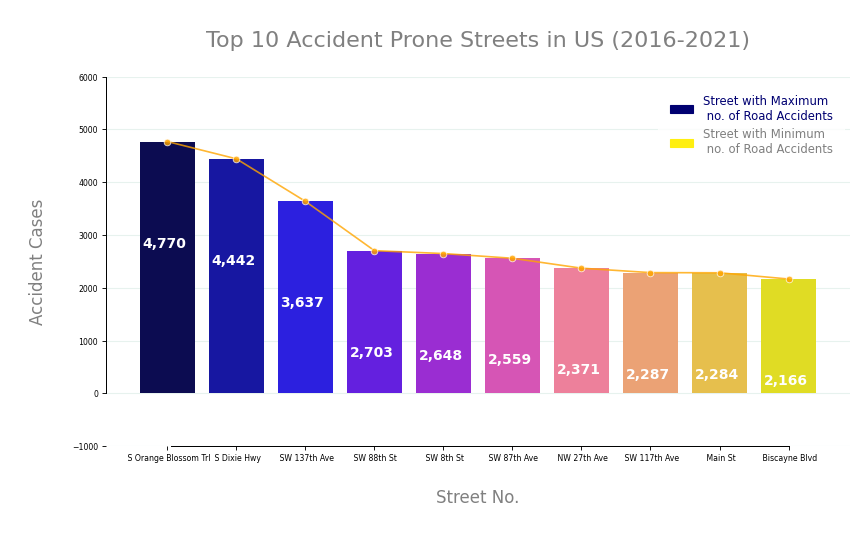

In [63]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')
ax1 = ax.twinx()
sns.lineplot(data = top_ten_streets_df, marker='o', x='Street No.', y='Cases', color = 'orange', alpha = .8)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')
    
ax.axes.set_ylim(-1000, 6000)
ax1.axes.set_ylim(-1000, 6000)
plt.title('\nTop 10 Accident Prone Streets in US (2016-2021)\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)

    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.05, 9)
ax.spines['left'].set_bounds(0, 6000)
ax1.spines['bottom'].set_bounds(0.05, 9)
ax1.spines['left'].set_bounds(0, 6000)
ax.tick_params(axis='both', which='major', labelsize=7)

MA = mpatches.Patch(color=clrs[1], label='Street with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-2], label='Street with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[1], 'grey'], edgecolor='white');

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> In last 5 years (2016-2020) <span style="font-weight: bold; ">Street 5orange blossom</span> is having the <span style="font-weight: bold;">highest road accidents records</span>.</li>
<br>
<li> In <span style="font-weight: bold;">Street Orange Blossom</span>, daily <span style="font-weight: bold; ">10 accidents</span> occurred in average.</li>
</ul>
</div>

In [59]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

41,496 Streets, 41.35%
98,928 Streets, 98.59%
100,308 Streets, 99.96%
39 Streets, 0.04%
0 Streets, 0.0%


<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">    
<li>In Our dataset, there are <b>total 100,342 Streets</b> enlisted for accidental cases,</li>
<br>
<li> There are <span style="font-weight: bold; ">41,496 Streets (41%)</span> in US which have <span style="font-weight: bold;">only 1 accident </span> record in past 5 years.</li>
<br>
<li> <span style="font-weight: bold;">98% Streets</span> of US, have <span style="font-weight: bold;">less than 100</span> road accident cases.</li>
<br>
<li> Only <span style="font-weight: bold; c">0.04% Streets</span> in US have the accident cases <span style="font-weight: bold; ">greater than 1000</span>.</li>
<br>
<li> In last 5 years record of road accidents,  <span style="font-weight: bold; ">0 Streets (0.03%)</span> have <span style="font-weight: bold; ">greater than 5000</span> cases.</li>   
</ul>
</div>


<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Severity Analysis</li>
</ul>

<p style="font-size:20px;">
It Shows the severity of the accident, a number between 1 and 4, where <span style="color:#122ecc;">1</span> indicates the <span style="color:#122ecc;">least impact on traffic (i.e., short delay as a result of the accident)</span> and <span style="color:#122ecc;">4 indicates a significant impact on traffic (i.e., long delay)</span>. Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.
</p>

In [64]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [65]:
fig = go.Figure(go.Funnelarea(
    text = ["Severity - 2","Severity - 3", "Severity - 4", "Severity - 1"],
    values = severity_df.Cases,
    title = {"position": "top center", 
             "text": "<b>Impact on the Traffic due to the Accidents</b>", 
             'font':dict(size=18,color="#7f7f7f")},
    marker = {"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
                "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
    ))

fig.show()

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">    
<li> In <span style="font-weight: bold;">94.3% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;">Moderate (Severity-2)</span>.</li>
<br>
<li> In <span style="font-weight: bold;">1.45% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;">highly Severe (Severity-4)</span>.</li>
</ul>
</div>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Time Analysis</li>
</ul>

<p style="font-size:20px;">
In this dataset we have <span style="color:#122ecc;">Start_Time & End_Time</span> for the timings of each accident.
<span style="color:#122ecc;">Start_Time</span> shows start time of the accident in <span style="color:#122ecc;">local time zone</span>.
End_Time shows end time of the accident in local time zone. <span style="color:#122ecc;">End time</span> here refers to when the impact of accident on <span style="color:#122ecc;">traffic flow</span>.
</p>

<p style="font-size:20px;">
In this dataset we have <span style="color:#122ecc;">Start_Time & End_Time</span> for the timings of each accident.
<span style="color:#122ecc;">Start_Time</span> shows start time of the accident in <span style="color:#122ecc;">local time zone</span>.
End_Time shows end time of the accident in local time zone. <span style="color:#122ecc;">End time</span> here refers to when the impact of accident on <span style="color:#122ecc;">traffic flow</span>.
</p>

In [70]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [71]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

In [69]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

cmap = cm.get_cmap('bwr', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='bwr')
ax1 = ax.twinx()
sns.lineplot(data = top_10_accident_duration_df, marker='o', x='Duration', y='Cases', color = 'orange', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

ax.set(ylim =(1000, 25000))
ax1.set(ylim =(1000, 25000))

plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=12)
MA = mpatches.Patch(color=clrs[-3], label='Duration with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-3], facecolor='#e6f2ed', edgecolor='#e6f2ed');

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">   
<li> From the above plot, it is inferred that <span style="font-weight: bold;">majority (1.4%)</span> of road accidents, have impacted on the traffic flow for <span style="font-weight: bold;">30 min to 75 min</span>.</li>   
</ul>
</div>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Month Analysis</li>
</ul>

In [73]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

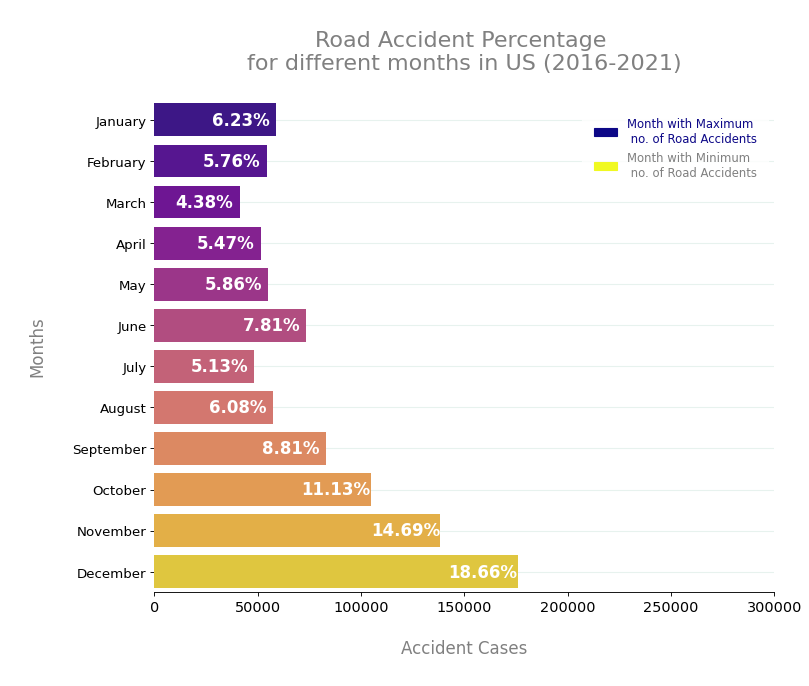

In [75]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = cm.get_cmap('plasma', 12)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='plasma')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-17000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='white', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different months in US (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nMonths\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 300000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 300000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Month with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Month with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');



<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">   
<li> Around <span style="font-weight: bold;">18%</span> of the road accidents occurred in the month of <span style="font-weight: bold; ">December</span>.</li>
<br>
<li> <span style="font-weight: bold; ">March</span> is month with <span style="font-weight: bold; ">least (4.38%)</span> no. of road accidents in US.</li>
<br>
<li> <span style="font-weight: bold; ">44%</span> of the road accidents occurred only within the <span style="font-weight: bold;">3 months, October to December</span> <span style="font-weight: bold;">(i.e., transition period from Autumn to Winter)</span>.</li> 
</ul>
</div>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Day Analysis</li>
</ul>

In [76]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

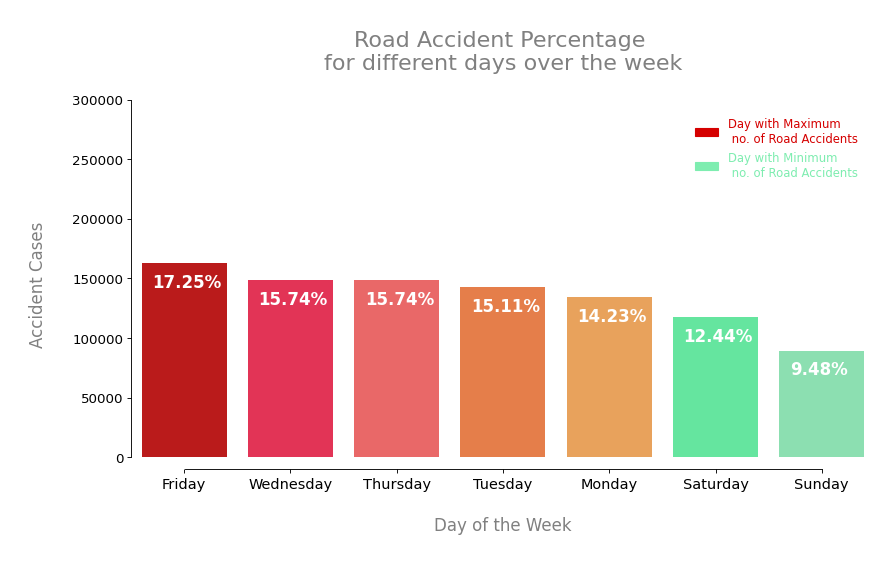

In [77]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(-10000, 300000)
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 300000)

MA = mpatches.Patch(color='#D50000', label='Day with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Day with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0']);



<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li> <span style="font-weight: bold; ">Working Days</span> of the week have a <span style="font-weight: bold; "> higher</span> accident percentage, compared with the <span style="font-weight: bold;">Weekend Days.</span> </li>
<br>
<li> Only around <span style="font-weight: bold; ">21%</span> road accident records occurred in <span style="font-weight: bold; ">weekend</span>.</li>
<br>
<li> <span style="font-weight: bold; ">Friday</span> is having the <span style="font-weight: bold; ">highest</span> percentage of road accidents.</li>
<br>
<li> On <span style="font-weight: bold; ">Sunday</span> the percentage of road accidents in US is <span style="font-weight: bold; ">lowest</span>.</li>
</ul>
</div>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;">Hour Analysis</li>
</ul>

In [78]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

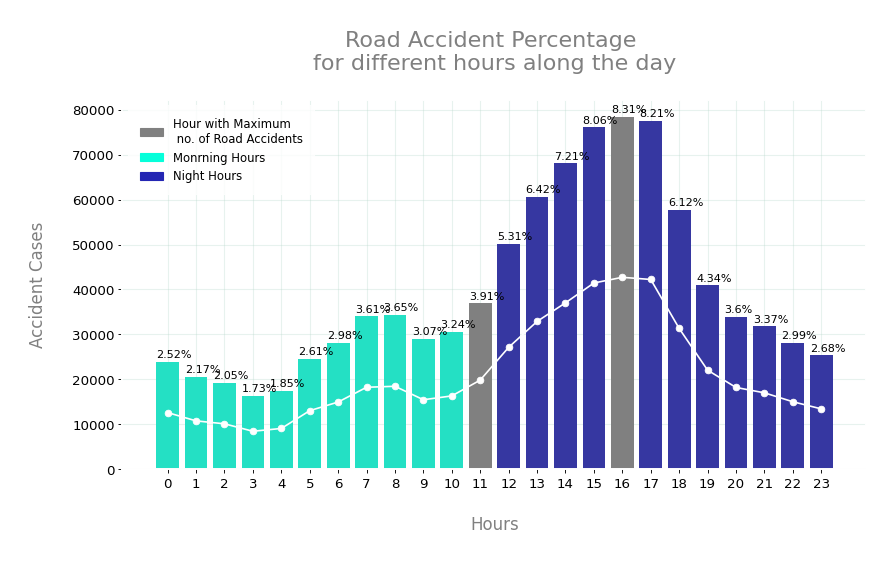

In [79]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpatches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">  
<li> Around <span style="font-weight: bold; ">14%</span> of the road accidents occurred in between <span style="font-weight: bold; ">6:00AM</span> to <span style="font-weight: bold; ">9:00AM</span>.</li>
<br>
<li> In evening, around <span style="font-weight: bold; ">9%</span> of the road accidents occurred in between <span style="font-weight: bold; ">3:00PM</span> to <span style="font-weight: bold;">6:00PM</span>.</li>
<br>
<li> The <span style="font-weight: bold; ">most-deadliest accident hour</span> is <span style="font-weight: bold;">4:00PM</span> implies the <span style="font-weight: bold;">Evening Office-Returning Hours</span>.</li>
<br>
<li> The <span style="font-weight: bold; ">2nd most-deadliest accident hour</span> is <span style="font-weight: bold; ">11:00AM</span> implies the <span style="font-weight: bold; ">Morning Office-Going Hours</span>.</li>   
</ul>
</div>

# Data Preprocessing


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     943318 non-null  object        
 1   Severity               943318 non-null  int64         
 2   Start_Time             943318 non-null  datetime64[ns]
 3   End_Time               943318 non-null  datetime64[ns]
 4   Start_Lat              943318 non-null  float64       
 5   Start_Lng              943318 non-null  float64       
 6   End_Lat                943318 non-null  float64       
 7   End_Lng                943318 non-null  float64       
 8   Distance(mi)           943318 non-null  float64       
 9   Description            943318 non-null  object        
 10  Number                 943318 non-null  float64       
 11  Street                 943318 non-null  object        
 12  Side                   943318 non-null  ob

## Encoding

In [96]:
df = df.drop(columns = ["ID","Number","Street","Side","City","County","State","Zipcode","Country","Timezone","Airport_Code","Start_Lat","Start_Lng","End_Lat","End_Lng"])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               943318 non-null  int64         
 1   Start_Time             943318 non-null  datetime64[ns]
 2   End_Time               943318 non-null  datetime64[ns]
 3   Distance(mi)           943318 non-null  float64       
 4   Description            943318 non-null  object        
 5   Weather_Timestamp      943318 non-null  object        
 6   Temperature(F)         943318 non-null  float64       
 7   Wind_Chill(F)          943318 non-null  float64       
 8   Humidity(%)            943318 non-null  float64       
 9   Pressure(in)           943318 non-null  float64       
 10  Visibility(mi)         943318 non-null  float64       
 11  Wind_Direction         943318 non-null  object        
 12  Wind_Speed(mph)        943318 non-null  fl

In [99]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Description', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [100]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

In [101]:
df.head(3)

Severity          Start_Time            End_Time  Distance(mi)  \
42         4 2016-02-09 18:20:58 2016-02-10 00:20:58         6.690   
43         4 2016-02-09 18:20:58 2016-02-10 00:20:58         6.690   
47         4 2016-02-10 06:18:49 2016-02-10 12:18:49         1.206   

    Description  Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
42        82811                  0            19.9            7.3   
43        82824                  0            19.9            7.3   
47        84002                  1            17.1            0.6   

    Humidity(%)  Pressure(in)  ...  Roundabout  Station  Stop  \
42         81.0         29.85  ...           0        0     0   
43         81.0         29.85  ...           0        0     0   
47         77.0         29.91  ...           0        0     0   

    Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
42                0               0             0               1   
43                0               0             0               1   
47                0               0             0               1   

    Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  
42               0                  0                      0  
43               0                  0                      0  
47               1                  1                      0  

[3 rows x 32 columns]

Create column that describes the period of the accident by subtracting end time with the start time of the accident

In [102]:
df['Duration(H)']=(pd.to_datetime(df.End_Time)-pd.to_datetime(df.Start_Time)).astype('timedelta64[h]')

In [103]:
df["Duration(H)"].describe()

count    943318.000000
mean          3.820934
std          84.626403
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max       16022.000000
Name: Duration(H), dtype: float64

Now we only want features that are relevant. Since our goals is to predict severity and duration of the accidents, some features such as addresses, coordinates, and near by airport don't really help here, so we are dropping those features


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               943318 non-null  int64         
 1   Start_Time             943318 non-null  datetime64[ns]
 2   End_Time               943318 non-null  datetime64[ns]
 3   Distance(mi)           943318 non-null  float64       
 4   Description            943318 non-null  int32         
 5   Weather_Timestamp      943318 non-null  int32         
 6   Temperature(F)         943318 non-null  float64       
 7   Wind_Chill(F)          943318 non-null  float64       
 8   Humidity(%)            943318 non-null  float64       
 9   Pressure(in)           943318 non-null  float64       
 10  Visibility(mi)         943318 non-null  float64       
 11  Wind_Direction         943318 non-null  int32         
 12  Wind_Speed(mph)        943318 non-null  fl

Starting with timestamp data, we have 3 features that are represented in timestamp. First we need to convert them from string into standard timestamp type of Pandas

In [105]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['End_Time'] = pd.to_datetime(df['End_Time'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

then since a timestamp has a lot of info, we want to seprate each timestamp info into smaller numerical values such as hours, weeks, day of the week, etc.

In [106]:
df['Start_Time_year'] = df['Start_Time'].dt.year
df['Start_Time_month'] = df['Start_Time'].dt.month
df['Start_Time_week'] = df['Start_Time'].dt.week
df['Start_Time_day'] = df['Start_Time'].dt.day
df['Start_Time_hour'] = df['Start_Time'].dt.hour
df['Start_Time_minute'] = df['Start_Time'].dt.minute
df['Start_Time_dayofweek'] = df['Start_Time'].dt.dayofweek

df['End_Time_year'] = df['End_Time'].dt.year
df['End_Time_month'] = df['End_Time'].dt.month
df['End_Time_week'] = df['End_Time'].dt.week
df['End_Time_day'] = df['End_Time'].dt.day
df['End_Time_hour'] = df['End_Time'].dt.hour
df['End_Time_minute'] = df['End_Time'].dt.minute
df['End_Time_dayofweek'] = df['End_Time'].dt.dayofweek

df['Weather_Timestamp_year'] = df['Weather_Timestamp'].dt.year
df['Weather_Timestamp_month'] = df['Weather_Timestamp'].dt.month
df['Weather_Timestamp_week'] = df['Weather_Timestamp'].dt.week
df['Weather_Timestamp_day'] = df['Weather_Timestamp'].dt.day
df['Weather_Timestamp_hour'] = df['Weather_Timestamp'].dt.hour
df['Weather_Timestamp_minute'] = df['Weather_Timestamp'].dt.minute
df['Weather_Timestamp_dayofweek'] = df['Weather_Timestamp'].dt.dayofweek



In [107]:
df=df.drop(columns=['Start_Time','End_Time','Weather_Timestamp'])

In [108]:
df = df.drop(columns=['Description'])

In [19]:
df

Severity  Distance(mi)  Description  Temperature(F)  Wind_Chill(F)  \
42              4         6.690        82811            19.9            7.3   
43              4         6.690        82824            19.9            7.3   
47              4         1.206        84002            17.1            0.6   
50              2         0.824        71607            21.0            9.9   
66              2         0.462        50250            24.1            7.1   
...           ...           ...          ...             ...            ...   
2845298         3         0.109        47542            78.0           78.0   
2845302         4         0.708        84028            98.0           98.0   
2845303         4         0.708        82121            98.0           98.0   
2845304         3         0.000        62537            67.0           67.0   
2845307         3         0.197        48155            70.0           70.0   

         Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Direction  \
42              81.0         29.85             2.0              20   
43              81.0         29.85             2.0              20   
47              77.0         29.91             2.5              22   
50              85.0         29.69             1.0              21   
66              75.0         29.82             2.0              22   
...              ...           ...             ...             ...   
2845298         54.0         29.77            10.0               7   
2845302         23.0         29.62            10.0              11   
2845303         23.0         29.62            10.0              11   
2845304         73.0         28.61            10.0              19   
2845307         76.0         29.87             9.0              17   

         Wind_Speed(mph)  ...  End_Time_hour  End_Time_minute  \
42                  12.7  ...              0                0   
43                  12.7  ...              0                0   
47                  19.6  ...              0                0   
50                  10.4  ...              0                0   
66                  28.8  ...              0                0   
...                  ...  ...            ...              ...   
2845298              7.0  ...              0                0   
2845302              8.0  ...              0                0   
2845303              8.0  ...              0                0   
2845304              3.0  ...              0                0   
2845307              3.0  ...              0                0   

         End_Time_dayofweek  Weather_Timestamp_year  Weather_Timestamp_month  \
42                        3                    1970                        1   
43                        3                    1970                        1   
47                        3                    1970                        1   
50                        3                    1970                        1   
66                        3                    1970                        1   
...                     ...                     ...                      ...   
2845298                   3                    1970                        1   
2845302                   3                    1970                        1   
2845303                   3                    1970                        1   
2845304                   3                    1970                        1   
2845307                   3                    1970                        1   

         Weather_Timestamp_week  Weather_Timestamp_day  \
42                            1                      1   
43                            1                      1   
47                            1                      1   
50                            1                      1   
66                            1                      1   
...                         ...                    ...   
2845298                       1                      1   
2845302      

In [21]:
df.isna().sum()


Severity                       0
Distance(mi)                   0
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset                 0
Civil_Twilight                 0
Nautical_Twilight              0
Astronomical_Twilight          0
Duration(H)                    0
Start_Time_year                0
Start_Time

We also don't need the Description feature as their description doesn't help a lot ot our goal and it's mostly relate to the addresses feature that we dropped in the beginning. They will also require a lot of text vectorization and other NLP processing which won't worth our time in this project

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 50 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Severity                     int64  
 1   Distance(mi)                 float64
 2   Temperature(F)               float64
 3   Wind_Chill(F)                float64
 4   Humidity(%)                  float64
 5   Pressure(in)                 float64
 6   Visibility(mi)               float64
 7   Wind_Direction               object 
 8   Wind_Speed(mph)              float64
 9   Precipitation(in)            float64
 10  Weather_Condition            object 
 11  Amenity                      bool   
 12  Bump                         bool   
 13  Crossing                     bool   
 14  Give_Way                     bool   
 15  Junction                     bool   
 16  No_Exit                      bool   
 17  Railway                      bool   
 18  Roundabout                   bool   
 19  

Let's take a look at the weather condition feature. It looks like there are compounded weather for certain data. We can't do label encoding here so let's use one hot encoding to convert them into 0 and 1 for each weather category.

In [23]:
df['Weather_Condition'].unique()

array([45, 52, 56, 55, 72, 10,  5, 33, 38, 35,  4, 42, 12, 31, 20, 59,  2,
       37, 17, 86,  7, 78, 60, 57, 85, 65, 11, 24, 39, 70, 34, 53, 28, 27,
        6, 80, 54, 26, 66, 51, 73, 46, 48, 79, 67, 58, 89, 21, 18, 74, 81,
       19, 40,  1,  9, 13, 25, 47, 44,  0, 88, 76,  8, 90, 71, 77, 32, 62,
       64, 61, 49, 22, 63, 87, 41, 84, 36, 15, 68, 14, 23,  3, 16, 69, 43,
       82, 75, 83, 29, 30, 50])

In [ ]:
ohe.info()

## Feature importance

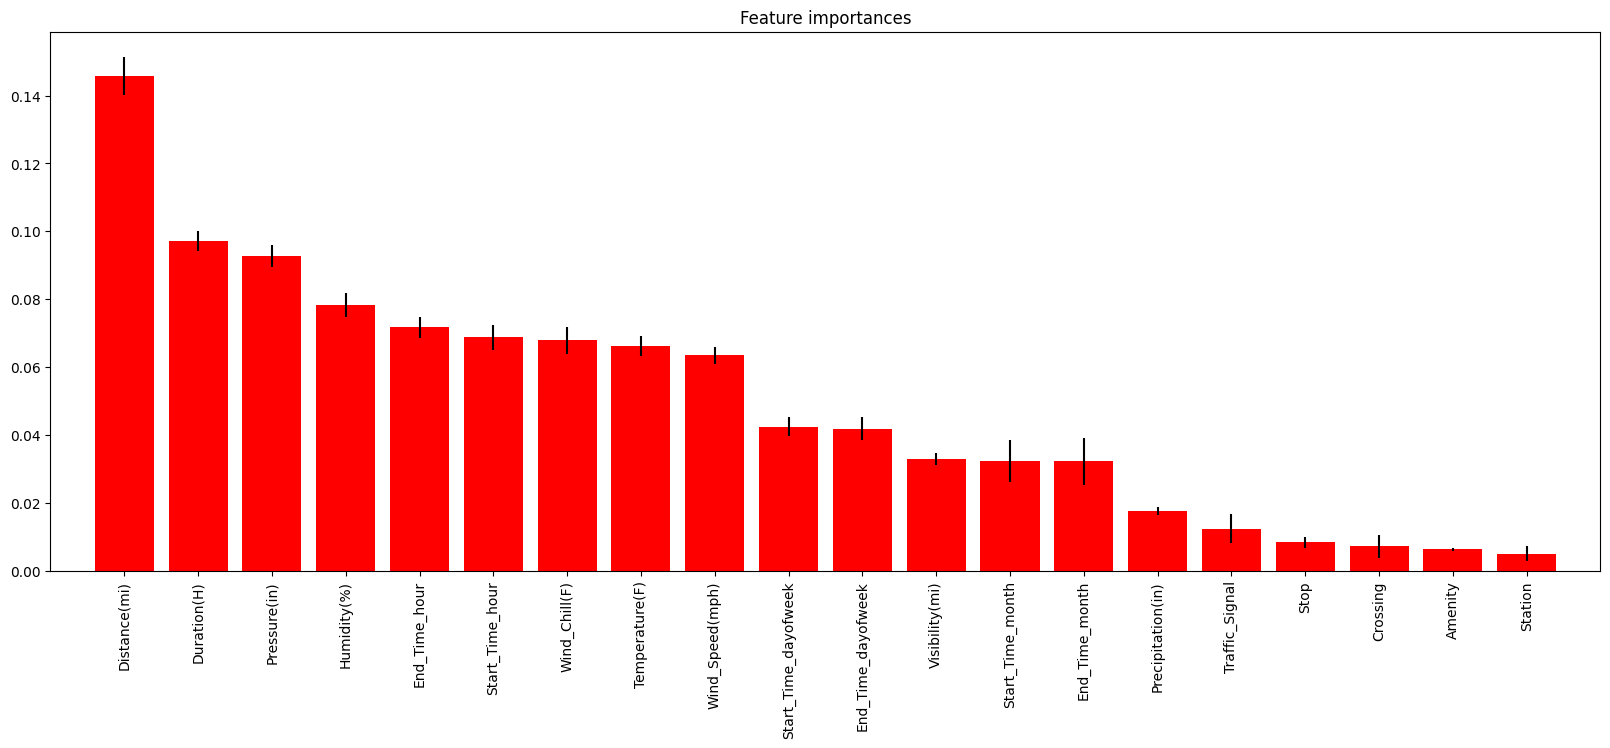

In [111]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)


importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

# Models

### Train Test Split

In [112]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [113]:
y.unique()

array([4, 2, 3, 1], dtype=int64)

In [114]:
y = y-1

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=38,stratify=y)

<h2>1-KNN</h2> 

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [117]:
knn=KNeighborsClassifier(n_neighbors=5)

In [118]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [119]:
prediction_knn=knn.predict(X_test)

In [120]:
print("Prediction for test set: {}".format(prediction_knn))

Prediction for test set: [1 1 1 ... 1 1 1]


In [121]:
a=pd.DataFrame({'Actual values':y_test,'Predicted values':prediction_knn})
a.head()

Actual values  Predicted values
1483147              1                 1
1876131              1                 1
242556               1                 1
1496784              1                 1
266071               1                 1

In [122]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
matrix=confusion_matrix(y_test,prediction_knn)

              precision    recall  f1-score   support

           0       0.51      0.32      0.40      2656
           1       0.95      0.99      0.97    222477
           2       0.42      0.10      0.17      3429
           3       0.48      0.08      0.13      7268

    accuracy                           0.94    235830
   macro avg       0.59      0.37      0.42    235830
weighted avg       0.92      0.94      0.93    235830



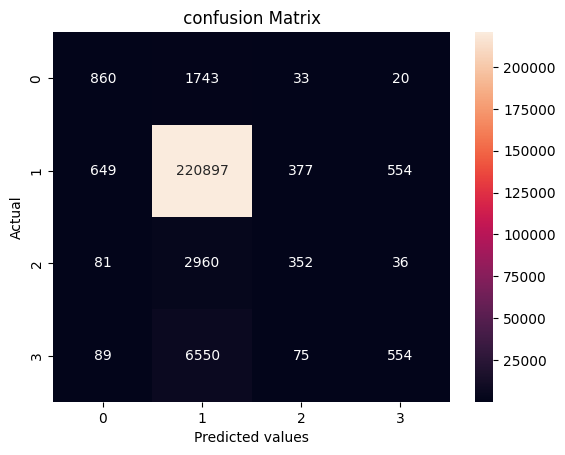

In [124]:
sns.heatmap(matrix,annot=True,fmt="d")
plt.title(' confusion Matrix ')
plt.xlabel('Predicted values')
plt.ylabel('Actual')
print(classification_report(y_test,prediction_knn))

# Another model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [70]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [71]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 40
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
14150/14150 [==============================] - 50s 2ms/step - loss: 17.0187 - accuracy: 0.9298 - val_loss: 0.2752 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 2/100
14150/14150 [==============================] - 35s 3ms/step - loss: 0.2751 - accuracy: 0.9434 - val_loss: 0.2757 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 3/100
14150/14150 [==============================] - 38s 3ms/step - loss: 0.2746 - accuracy: 0.9434 - val_loss: 0.2747 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 4/100
14150/14150 [==============================] - 38s 3ms/step - loss: 0.2745 - accuracy: 0.9434 - val_loss: 0.2745 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 5/100
14150/14150 [==============================] - 39s 3ms/step - loss: 0.2746 - accuracy: 0.9434 - val_loss: 0.2742 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 6/100
14150/14150 [==============================] - 44s 3ms/step - loss: 0.2745 - accuracy: 0.9434 - val_loss: 0.2743 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 7/100
14150/14150 [========

In [72]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.9433786869049072


In [73]:
losses=pd.DataFrame(history.history)

In [74]:
l = pd.DataFrame({'loss':losses['loss'], 'validation_loss':losses['val_loss']})

# Cross-validation and Hyperparameter Tuning

Then we create two separate df, one for severity prediction and one for duration prediction

In [126]:
dfCLF = df
dfReg = df

Then we create two separate df, one for severity prediction and one for duration prediction

In [127]:
dfReg= df.drop(columns = ['End_Time_month','End_Time_hour','End_Time_dayofweek'])

For severity prediciton, duration is a redundant feature since we have the end time

In [128]:
dfCLF = df.drop(columns = ['Duration(H)'])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Severity                     943318 non-null  int64  
 1   Distance(mi)                 943318 non-null  float64
 2   Temperature(F)               943318 non-null  float64
 3   Wind_Chill(F)                943318 non-null  float64
 4   Humidity(%)                  943318 non-null  float64
 5   Pressure(in)                 943318 non-null  float64
 6   Visibility(mi)               943318 non-null  float64
 7   Wind_Speed(mph)              943318 non-null  float64
 8   Precipitation(in)            943318 non-null  float64
 9   Amenity                      943318 non-null  int64  
 10  Bump                         943318 non-null  int64  
 11  Crossing                     943318 non-null  int64  
 12  Give_Way                     943318 non-null  int64  
 1

For duration prediction, it is a regression problem as we are predicting a continuous value

We specify our label and training data

In [130]:
df = dfReg
X = df.drop('Duration(H)',axis=1)
y = df['Duration(H)']
y

42         6.0
43         6.0
47         6.0
50         6.0
66         6.0
          ... 
2845298    0.0
2845302    0.0
2845303    0.0
2845304    0.0
2845307    0.0
Name: Duration(H), Length: 943318, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((660322, 32), (282996, 32))

# Training and Validation - Severity


In [136]:
from sklearn.ensemble import RandomForestClassifier


In [133]:
df = dfCLF
X = df.drop('Severity',axis=1)
y = df['Severity']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((660322, 34), (282996, 34))

In [137]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

# Cross-validation and Hyperparameter Tuning

We are going to crossvalidate using a GridSearch CV. This not only help us detect overfitting, but also tune our hyperparameter to find the best model

In [138]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [ ]:
grid_search.best_score_